### 01. Steps to classification

1. Build a model.
2. Model learns from the labeled data we pass to it.
3. Pass unlabeled data to the model as input.
4. Model predicts the labels of unseen data. 
* Labeled data = Training data.

### 02. K-Nearest Neighbors

1. Predict the label of a data point by looking at the 'k' closest labeled data points.
2. Majortity vote. 
3. **Question: What is L-Nearest Neighbors?**


     Answer: K-nearest neighbors (K-NN) is a machine learning technique that predicts the class or value of a data point based on the majority class of its nearest neighbors in a training dataset.

### 03. Importing Libraries

In [1]:
from sklearn.neighbors import KNeighborsClassifier

### 04. Reading CSV file

In [2]:
import pandas as pd
churn_df = pd.read_csv("Dataset-1_telecom_churn_clean.csv")
churn_df.head()

,Unnamed: 0,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


### 05. Introducing X and y variable

In [3]:
X = churn_df[["total_day_charge","total_eve_charge"]].values
y = churn_df["churn"].values

### 06. Print shapes of X and y

In [4]:
print(X.shape,y.shape)

(3333, 2) (3333,)


(3333,2) means 3333 observations with 2 columns(features)

### 07. Fit the model

In [5]:
knn = KNeighborsClassifier(n_neighbors = 15)
knn.fit(X,y)

KNeighborsClassifier(n_neighbors=15)

### 08. Introducing X_new variable

In [6]:
import numpy as np
X_new = np.array([[56.8,17.5],
                  [24.4,24.1],
                  [50.1,10.9]])
print(X_new.shape)

(3, 2)


### 09. Run the model

In [7]:
predictions = knn.predict(X_new)
print("Predictions: {}".format(predictions))

Predictions: [1 0 0]


### 10. Measuring Model Performance with Accuracy

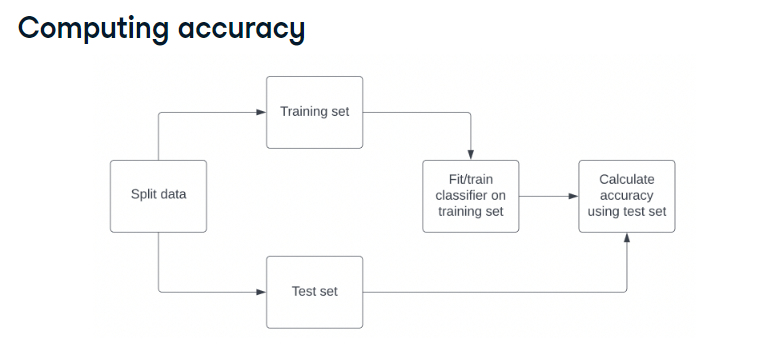

### 11. Fit the Model

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=21,stratify=y)
knn = KNeighborsClassifier(n_neighbors = 6)
knn.fit(X_train,y_train)
print(knn.score(X_test,y_test))

0.872


##### 11.01. `X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=21,stratify=y)` What does `random_state=21` and `stratify=y` means?


Answer: 

`random_state=21`




Imagine, I have a magic box that will give me random numbers. But everytime you open the box, I will get a different random number. It's like, rolling a dice and getting different values each time. Now, you and your friend have the magic box and you want to do the same thing with same random numbers. Will the different random number will allow you to reach your goal? No.


That's where special seed comes in. Think of this seed as a special secret code before you open the magic box. If you apply this secret code, this will generate the same random number. So, your friend will also be able to play with magic box with the same secret number, if you tell him that number. 


Now, imagine you are splitting your toys into 2 groups. One is for playing now and another group will be played later. If you choose the toys at random, you may end up getting less favorite toys in one group. That's why, the magic number plays a role. You and your friend use that secret number now. So, you are your friend will get same mix of toys in both groups.



`stratify=y`



Imagine you have a classification problem where you're trying to predict whether an email is spam or not spam. In your original dataset, let's say 80% of the emails are not spam and 20% are spam. If you randomly split the data into training and testing sets without considering this imbalance, you might end up with a training set that's predominantly not spam and a testing set that's predominantly spam. This could lead to skewed results when you evaluate your model's performance.

stratify=y helps address this issue. When you use stratify=y, the data splitting process ensures that the proportion of classes in the original dataset is preserved in both the training and testing sets. So, if 80% of your original data is not spam and 20% is spam, using stratify=y ensures that your training and testing sets will also have approximately the same proportions of spam and not spam.



In simpler words, suppose you have some chocolates with green,red,blue packets. Now you want to split those chocolates to your 5 friends. You want to make sure that everyone of your group of 5 friends get the same proportion of colored chocolates like you have. In this case, `stratify=y` will work!

##### 11.02. Significance of `random_state=21` 

You are telling the computer to split the data into `test_data` and `training_data`, by using `train_test_split` function. But here is a catch. If you don't use the secret number `random_state=21`, you will get different splitted data every time you want to run the data.

##### 11.03. What is the difference between `test_size=0.3` and `random_state=21`?

`test_size=0.3`

Imagine you have a bag of murbles. You are preparing for a game tomorrow. Your `test_size` is `0.3` or `30%`. Means, 30% of your murbles of your bag, you will use for playing final game. Remaining 70% of the murbles you will use to train yourself.


`random_state=21`


Imagine, you are splitting the marbles from a box. You have in total 20 marbles. You and your friend will split these marbles between yourselves. If you don't have any `random_state`, you may end up getting 10-10 marbles split first time and 12-8 marbles split 2nd time. Splitting each time will be different. But if provide a number, `random_state=5`, each time the splitting game will start from the 5th marble and split the marbles exactly. There will be no difference in splitting. 

### 12. Model Complexity

Larger k = less complex model = can cause underfitting




Smaller k = more complex model = can cause overfitting

##### 12.01. Model Complexity and Overfitting/Underfitting

In [11]:
import numpy as np

In [13]:
train_accuracies = {}
test_accuracies = {}
neighbors = np.arange(1,26)   ## It's 'arange', not 'arrange' 

for neighbor in neighbors:
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X_train,y_train)
    train_accuracies[neighbor] = knn.score(X_train,y_train)    
    ### knn.score measures the accuracy of the knn classifier here
    test_accuracies[neighbor] = knn.score(X_test,y_test)


##### 12.02. How does `knn.score()` work?

`knn.score` measures the accuracy of the knn classifer. It compares the predicted y with the targeted y already mentioned in the dataset and returns the result. 